# User Network Analysis

After getting the social network information from the top 20 followers of Periphery and Tesseract, we want to graph their networks.  The goal is to find any discrepencies between the networks of the top 20 followers of the two bands.

In [1]:
# Read network dictionary for Tesseract and Periphery

import json
import numpy as np
import pandas as pd

with open('T_follower_netowrk.json') as f:
    T_follower_network = json.loads(f.read())

with open('P_follower_netowrk.json') as f:
    P_follower_network = json.loads(f.read())
    
with open('T_top20_counts.json') as f:
    T_top20_counts = json.load(f)

with open('P_top20_counts.json') as f:
    P_top20_counts = json.load(f)
    
ID_of_Tesseract = 36942216
ID_of_Periphery = 78037872

In [2]:
# Load Periphery and Tesseract follower list

def read_ids(filepath):
    '''Read list of ids from txt to python'''
    with open(filepath) as file:
        content = file.readlines()
    content = [int(i.rstrip('\n')) for i in content]
    return content

with open('lastReadDate_T.txt') as file:
    last_t_write_date = [i.rstrip('\n') for i in file.readlines()]
with open('lastReadDate_P.txt') as file:
    last_p_write_date = [i.rstrip('\n') for i in file.readlines()]


tesseract_ids = read_ids('tesseract_follower_ids_'+last_t_write_date[0]+'.txt')
periphery_ids = read_ids('periphery_follower_ids_'+last_p_write_date[0]+'.txt')

In [3]:
len(list(T_follower_network.keys()))

20

In [4]:
for v, k in T_follower_network.items():
    print(str(v) + ': ' + str(len(k)))

931587211635634176: 196
35522592: 48
872515996149481480: 1617
2761988122: 201
727809842870525952: 80
975811570696671233: 47
1970300258: 299
264645258: 3
4640719688: 132
793942601619513344: 108
2510685746: 634
3064695918: 253
992736907: 27625
33949973: 15240
272152883: 4392
3172626748: 518
3439331855: 118
453067439: 5805
2583352527: 27
19120963: 3849


In [5]:
for v, k in P_follower_network.items():
    print(str(v) + ': ' + str(len(k)))

30085630: 133753
788125848: 956
813892915: 232
214835498: 130
2774614848: 757
3241061475: 107
4822744573: 140
2994460191: 2040
2920260703: 725
318898422: 63
753118783288578048: 51
751937310804041728: 110
1693332632: 151
2416725230: 200
2480236158: 49
3104558539: 329
2605920973: 157
567965788: 62
4831110267: 12662
747448948789387264: 63


In [6]:
# Get list of nodes
T_nodes=[item for l in list(T_follower_network.values()) for item in l]
T_nodes.extend(list([int(i) for i in T_follower_network.keys()]))
T_nodes.extend([ID_of_Tesseract])
T_nodes = list(set(T_nodes))

P_nodes=[item for l in list(P_follower_network.values()) for item in l]
P_nodes.extend(list([int(i) for i in P_follower_network.keys()]))
P_nodes.extend([ID_of_Periphery])
P_nodes = list(set(P_nodes))


What percentage of Tesseract and Periphery followers are covered by the top 20 followers' networks?

In [7]:
def network_coverage(top20_followers, all_followers):
    temp = list(set(top20_followers) & set(all_followers))
    return len(temp)/len(all_followers)

In [8]:
T_FofF = [item for sublist in list(T_follower_network.values()) for item in sublist]
P_FofF = [item for sublist in list(P_follower_network.values()) for item in sublist]

In [9]:
T_FofF = list(set(T_FofF))
P_FofF = list(set(P_FofF))

In [10]:
# Tesseract and Periphery top20 follower coverage

print('Tesseract Top 20 Followers Network Coverage: ' + str(network_coverage(T_FofF, T_nodes)))
print('Periphery Top 20 Followers Network Coverage: ' + str(network_coverage(P_FofF, P_nodes)))

Tesseract Top 20 Followers Network Coverage: 0.9998449612403101
Periphery Top 20 Followers Network Coverage: 0.9999073295691487


This tells us that the top 20 followers of Tesseract and Periphery by themselves have covered almost all of the two bands' followers.  This is understandable given that this niche market can be a closed social circle where everybody follows one another.

In [11]:
# Get list of edges

T_edges = []
for key, value in T_follower_network.items():
    for v in value:
        T_edges.append((v, int(key)))
        
P_edges = []
for key, value in P_follower_network.items():
    for v in value:
        P_edges.append((v, int(key)))

In [12]:
T_top20_counts

{'931587211635634176': 14,
 '35522592': 10,
 '872515996149481480': 9,
 '2761988122': 9,
 '727809842870525952': 8,
 '975811570696671233': 8,
 '1970300258': 8,
 '264645258': 7,
 '4640719688': 7,
 '793942601619513344': 6,
 '2510685746': 6,
 '3064695918': 6,
 '992736907': 6,
 '33949973': 6,
 '272152883': 6,
 '3172626748': 6,
 '3439331855': 5,
 '453067439': 5,
 '2583352527': 5,
 '19120963': 5}

In [13]:
# Graph network of Tesseract and Periphery fans, including the two bands themselves

import networkx as nx
G_T = nx.DiGraph()
G_T.add_nodes_from(T_nodes)
G_T.add_edges_from(T_edges)

for follower in [i for i in list(T_follower_network.keys())]:
    G_T.add_edge(int(follower), ID_of_Tesseract)

G_P = nx.DiGraph()
G_P.add_nodes_from(P_nodes)
G_P.add_edges_from(P_edges)

for follower in [i for i in list(P_follower_network.keys())]:
    G_P.add_edge(int(follower), ID_of_Periphery)


In [14]:
P_degrees = [G_P.degree(n) for n in G_P.nodes()]
T_degrees = [G_T.degree(n) for n in G_T.nodes()]

In [15]:
P_degrees_series = pd.Series(P_degrees)
P_degrees_series.describe()

count    151073.000000
mean          2.022294
std         345.720625
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max      133754.000000
dtype: float64

In [16]:
pd.Series(T_degrees).describe()

count    58050.000000
mean         2.108941
std        135.569064
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max      27629.000000
dtype: float64

In [17]:
# T-Test for Means

import numpy as np
from scipy import stats

t, p = stats.ttest_ind(P_degrees, T_degrees, equal_var=False)

print(t)
print(p)

-0.08232434841516054
0.9343888717153521


With a p-value of 0.93 from the t-test we can say that the mean degrees of Periphery and Tesseract's networks are the same.  Bit we also need to also take into account that the shapes of the distributions might be different.  We need to look at how the histograms differ and use a test to confirm whether the distributions are statistically similar.

/Users/roblee/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


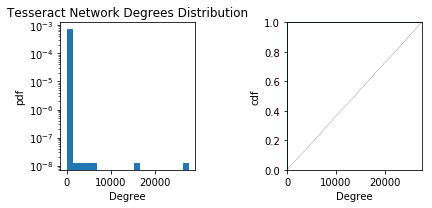

In [18]:
# Tesseract degrees plot

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

T_degrees = [G_T.degree(n) for n in G_T.nodes()]
T_degrees.sort()

fig = plt.figure(figsize=(6,3))

ax = plt.subplot(121)
ax.hist(T_degrees, bins=20, normed=True, log=True)
ax.set_xlabel('Degree')
ax.set_ylabel('pdf')
ax.set_title('Tesseract Network Degrees Distribution')

ax = plt.subplot(122)
ax.hist(T_degrees, bins=50, normed=True, cumulative=True, histtype='step')
ax.set_xlim(0, max(T_degrees))
ax.set_ylim(0, 1.0)
ax.set_xlabel('Degree')
ax.set_ylabel('cdf')
ax.plot([0, max(T_degrees)], [0, 1.0], ':', color='black', linewidth=0.5)

plt.tight_layout()

/Users/roblee/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


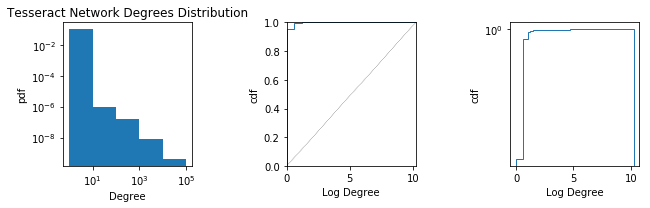

In [20]:
# Tesseract degrees plot

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

T_degrees = [G_T.degree(n) for n in G_T.nodes()]
T_degrees.sort()

fig = plt.figure(figsize=(9,3))

ax = plt.subplot(131)
bins = 10**np.arange(0, 6)
ax.set_xscale('log')
ax.hist(T_degrees, bins=bins, normed=True, log=True)
ax.set_xlabel('Degree')
ax.set_ylabel('pdf')
ax.set_title('Tesseract Network Degrees Distribution')

ax = plt.subplot(132)
ax.hist(np.log(T_degrees), bins = 50, normed=True, cumulative=True, histtype='step')
ax.set_xlim(0, max(np.log(T_degrees)))
ax.set_ylim(0, 1.0)
ax.set_xlabel('Log Degree')
ax.set_ylabel('cdf')
ax.plot([0, max(np.log(T_degrees))], [0, 1.0], ':', color='black', linewidth=0.5)

ax = plt.subplot(133)
ax.hist(np.log(T_degrees), bins = 50, normed=True, cumulative=True, histtype='step')
#ax.set_xlim(0, max(np.log(T_degrees)))
#ax.set_ylim(0, 1.0)
ax.set_xlabel('Log Degree')
ax.set_ylabel('cdf')
ax.set_yscale('log')
#ax.plot([0, max(np.log(T_degrees))], [0, 1.0], ':', color='black', linewidth=0.5)

plt.tight_layout()

#plt.savefig('Tesseract_degrees.png')

/Users/roblee/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


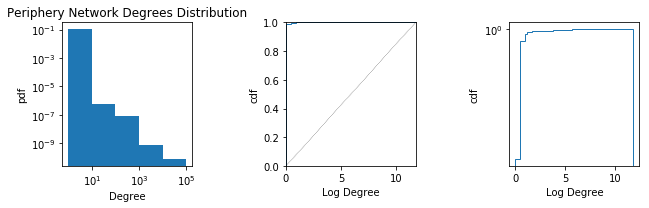

In [24]:
# Periphery degrees plot

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

P_degrees = [G_P.degree(n) for n in G_P.nodes()]
P_degrees.sort()

fig = plt.figure(figsize=(9,3))

ax = plt.subplot(131)
bins = 10**np.arange(0, 6)
ax.set_xscale('log')
ax.hist(P_degrees, bins=bins, normed=True, log=True)
ax.set_xlabel('Degree')
ax.set_ylabel('pdf')
ax.set_title('Periphery Network Degrees Distribution')

ax = plt.subplot(132)
ax.hist(np.log(P_degrees), bins = 50, normed=True, cumulative=True, histtype='step')
ax.set_xlim(0, max(np.log(P_degrees)))
ax.set_ylim(0, 1.0)
ax.set_xlabel('Log Degree')
ax.set_ylabel('cdf')
#ax.set_yscale('log')
ax.plot([0, max(np.log(P_degrees))], [0, 1.0], ':', color='black', linewidth=0.5)

ax = plt.subplot(133)
ax.hist(np.log(P_degrees), bins = 50, normed=True, cumulative=True, histtype='step')
#ax.set_xlim(0, max(np.log(P_degrees)))
#ax.set_ylim(0, 1.0)
ax.set_xlabel('Log Degree')
ax.set_ylabel('cdf')
ax.set_yscale('log')
#ax.plot([0, max(np.log(P_degrees))], [0, 1.0], ':', color='black', linewidth=0.5)

plt.tight_layout()

#plt.savefig('Periphery_degrees.png')

As we can see, the degree distributions of Periphery and Tesseract's follower networks are highly similar, with a few followers with high connectivity (record labels, other musicians) and an extremely large number of followers with very low connectivity (individual fans).  While visually the structure of these follower networks are very similar, we will see if we are able to use a test to quantify the similarity.

In [49]:
# Anderson-Darling test

from scipy import stats
import numpy as np

T_degrees_array = np.asarray(T_degrees)
P_degrees_array = np.asarray(P_degrees)

stats.anderson_ksamp(samples = [T_degrees_array, P_degrees_array])

/Users/roblee/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1694: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


OverflowError: math range error

array([ 0.78524017,  0.17061737, -0.55057179,  0.50691875,  2.53947155,
        0.67948836, -1.11609166, -0.13222284, -0.59708111,  1.39231301,
        0.23412461,  1.27275224,  1.64689583, -0.87037466,  0.08984242,
        1.06004203, -0.24467722, -1.4895727 , -1.26436792, -0.68437787,
        1.09550648, -0.7489652 , -0.78678832, -0.23881743, -0.14815017,
        1.02772453, -0.1878003 ,  0.50453277,  0.51748302,  0.96020883,
        0.17261669,  0.33198276, -0.85183116, -0.15795155,  0.33444939,
       -1.12992909,  0.90450624,  0.08745144,  0.68219204, -1.63118926,
       -0.14661754, -1.46855014,  1.32196454, -0.54247895, -1.66927341,
        0.94046345,  0.04543   , -0.19234927,  1.19963132,  0.31662936])

In [50]:
!pip install inspect

  Could not find a version that satisfies the requirement inspect (from versions: )
No matching distribution found for inspect


In [45]:
mport matplotlib.pyplot as plt
import numpy as np

T_degrees = [G_T.degree(n) for n in G_T.nodes()]
T_degrees.sort()

fig = plt.figure(figsize=(6,3))

ax = plt.subplot(121)
bins = 10**np.arange(0, 6)
ax.set_xscale('log')
ax.hist(T_degrees, bins=bins, normed=True, log=True)
ax.set_xlabel('Degree')
ax.set_ylabel('pdf')
ax.set_title('Tesseract Network Degrees Distribution')

ax = plt.subplot(122)
ax.hist(np.log(T_degrees), bins = 50, normed=True, cumulative=True, histtype='step')
ax.set_xlim(0, max(np.log(T_degrees)))
ax.set_ylim(0, 1.0)
ax.set_xlabel('Log Degree')
ax.set_ylabel('cdf')
ax.plot([0, max(np.log(T_degrees))], [0, 1.0], ':', color='black', linewidth=0.5)

plt.tight_layout()

SyntaxError: invalid syntax (<ipython-input-45-e1441f3c371f>, line 1)

In [40]:
T_degrees.sort(reverse=True)
P_degrees.sort(reverse=True)

In [41]:
T_degrees

[27629,
 15241,
 5806,
 4393,
 3850,
 1619,
 635,
 520,
 303,
 254,
 202,
 199,
 134,
 120,
 112,
 84,
 55,
 51,
 28,
 24,
 8,
 8,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 

In [42]:
P_degrees

[133754,
 12663,
 2041,
 958,
 758,
 727,
 330,
 233,
 201,
 158,
 153,
 141,
 131,
 111,
 109,
 65,
 64,
 64,
 52,
 50,
 21,
 12,
 11,
 9,
 7,
 7,
 7,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


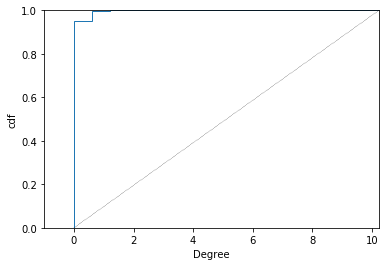

In [98]:
plt.hist(np.log(T_degrees), bins=50, normed=True, cumulative=True, histtype='step')
plt.xlim(-1, max(np.log(T_degrees)))
plt.ylim(0, 1.0)
plt.xlabel('Degree')
plt.ylabel('cdf')
plt.plot([0, max(np.log(T_degrees))], [0, 1.0], ':', color='black', linewidth=0.5)

In [83]:
sum([i+1 for i in np.log(T_degrees) if i+1 <= 4]) / sum([i+1 for i in np.log(T_degrees)]) 

0.99766950666106402

In [88]:
sum([i+1 for i in np.log(P_degrees) if i+1 <= 3]) / sum([i+1 for i in np.log(P_degrees)]) 

0.99901954371351909

(array([  5.78170000e+04,   2.11000000e+02,   2.00000000e+00,
          4.00000000e+00,   4.00000000e+00,   4.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          2.00000000e+00]),
 array([  0.        ,   1.02266212,   2.04532424,   3.06798637,
          4.09064849,   5.11331061,   6.13597273,   7.15863486,
          8.18129698,   9.2039591 ,  10.22662122]),
 <a list of 10 Patch objects>)

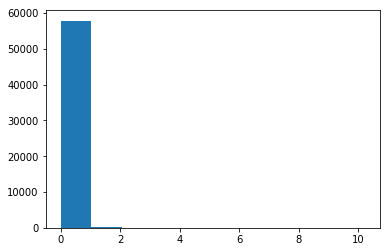

In [35]:
plt.hist(np.log(T_degrees))

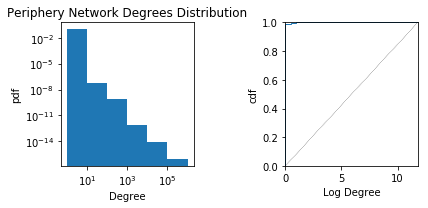

In [91]:
P_degrees = [G_P.degree(n) for n in G_P.nodes()]
P_degrees.sort()

fig = plt.figure(figsize=(6,3))

ax = plt.subplot(121)
bins = 10**np.arange(0, 7)
ax.set_xscale('log')
ax.hist(P_degrees, bins=bins, normed=True, log=True)
ax.set_xlabel('Degree')
ax.set_ylabel('pdf')
ax.set_title('Periphery Network Degrees Distribution')

ax = plt.subplot(122)
ax.hist(np.log(P_degrees), bins=50, normed=True, cumulative=True, histtype='step')
ax.set_xlim(0, max(np.log(P_degrees)))
ax.set_ylim(0, 1.0)
ax.set_xlabel('Log Degree')
ax.set_ylabel('cdf')
ax.plot([0, max(np.log(P_degrees))], [0, 1.0], ':', color='black', linewidth=0.5)

plt.tight_layout()

In [97]:
# KS Test of degrees composition of Tesseract and Periphery nodes:

from scipy.stats import ks_2samp

ks_2samp(np.log([1+i for i in T_degrees[1:]]), np.log([1+i for i in P_degrees[1:]]))
        

Ks_2sampResult(statistic=0.039322453969591775, pvalue=8.1826962092094981e-57)

In [43]:
np.log([1+i for i in T_degrees])

array([  0.69314718,   0.69314718,   0.69314718, ...,   8.66681937,
         9.63181005,  10.22665742])

We set out to explain why Periphery has more followers on Twitter than Tesseract.  So far, we observe that, while the characteristics of the follower networks are quite similar, Periphery enjoys more frequent interactions with its most active twitter followers, often by an order of 10 or more in terms of liking and retweeting activity.  

Basically, the fact that Periphery enjoys more fan interaction on Twitter could be for the following reasons: having more followers will lead to more interactions; having "better" followers (i.e. more connected intermediaries) will result in more fan interactions (which we just sort of disproved); and something else. As we can see up to now, the composition of the two networks are actually very similar in many respects. Unless the followers Something else must be driving the difference in popularity of the two bands.



# Follower Count and Interaction Intensity

We collected data from 20 similar metal bands with follower counts between 9,000 - 200,000.  They should give us an idea of how follower count affects interaction intensity, and where Periphery and Tesseract's observed interaction intensities compare with them.

In [6]:
import pickle

with open('interaction_intensity.pickle', 'rb') as f:
    interaction_intensity = pickle.load(f)

We will run a linear model to estimate the relationship between interaction intensity, defined as sum of the number of retweets and favorites, for the most recent 200 tweets, using linear regression.

In [7]:
data = pd.DataFrame(interaction_intensity, columns=['follower_count', 'favorite_count', 'retweet_count', 'interaction_intensity'])

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(11,4))

ax = plt.subplot(121)

ax.scatter(data.follower_count, data.interaction_intensity)
ax.set_xlabel('Follower Count')
ax.set_ylabel('Total Interaction Count')
ax.set_title('Total Interaction Count vs. Follower Count (44 Reference Bands, Most Recent 200 Tweets)', loc='left')
ax.text(100000, 25000, 'Periphery')
ax.text(50000, 6000, 'Tesseract')
ax.plot([0,300000], [2597.3273, 24317.3273], color = 'r', linestyle = '-')

ax = plt.subplot(122)
ax.axis('off')
ax.text(0, 0.5,'interaction_count = 2597.3273 + 0.0724 * follower_count',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes)
ax.text(0, 0.4,'constant and follower_count coefficient are significant at 0.05 level',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes)

plt.savefig('II_FC.png')

In [178]:
# Credit to shahejokarian
# https://github.com/shahejokarian/regression-prediction-interval

import pandas as pd
import numpy as np
from sklearn import linear_model
from __future__ import division

class LRPI:
    def __init__(self, normalize=False, n_jobs=1, t_value = 2.13144955):
        self.normalize = normalize
        self.n_jobs = n_jobs
        self.LR = linear_model.LinearRegression(normalize=self.normalize, n_jobs= self.n_jobs)
        self.t_value = t_value
        
    def fit(self, X_train, y_train):
        self.X_train = pd.DataFrame(X_train.values)
        self.y_train = pd.DataFrame(y_train.values)
        
        self.LR.fit(self.X_train, self.y_train)
        X_train_fit = self.LR.predict(self.X_train)
        self.MSE = np.power(self.y_train.subtract(X_train_fit), 2).sum(axis=0) / (self.X_train.shape[0] - self.X_train.shape[1] - 1)
        self.X_train.loc[:, 'const_one'] = 1
        self.XTX_inv = np.linalg.inv(np.dot(np.transpose(self.X_train.values) , self.X_train.values))
        
    def show_output(self):
        print(self.LR.coef_)
        
    def predict(self, X_test):
        self.X_test = pd.DataFrame(X_test.values)
        self.pred = self.LR.predict(self.X_test)
        self.X_test.loc[: , 'const_one'] =1
        SE = [np.dot(np.transpose(self.X_test.values[i]) , np.dot(self.XTX_inv, self.X_test.values[i]) ) for i in range(len(self.X_test)) ]
        results = pd.DataFrame(self.pred , columns=['Pred'])
        
        results.loc[:,"lower"] = results['Pred'].subtract((self.t_value)* (np.sqrt(self.MSE.values + np.multiply(SE,self.MSE.values) )),  axis=0)
        results.loc[:,"upper"] = results['Pred'].add((self.t_value)* (np.sqrt(self.MSE.values + np.multiply(SE,self.MSE.values) )),  axis=0)
        
        return results

In [179]:
X = data['follower_count']
y = data['interaction_intensity']

lm_fit = LRPI()
lm_fit.fit(X, y)

In [184]:
y.head()

0     5138
1    23544
2     4352
3     2113
4      891
Name: interaction_intensity, dtype: int64

In [180]:
import statsmodels.api as sm # import statsmodels 

X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     interaction_intensity   R-squared:                       0.429
Model:                               OLS   Adj. R-squared:                  0.415
Method:                    Least Squares   F-statistic:                     31.50
Date:                   Tue, 29 May 2018   Prob (F-statistic):           1.43e-06
Time:                           16:05:39   Log-Likelihood:                -446.79
No. Observations:                     44   AIC:                             897.6
Df Residuals:                         42   BIC:                             901.1
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2597.3273   1153.895      2.251      0.030     268.673    4925.982
follower_count     0.0724      0.013      5.612      0.000       0.046       0.098
==============================================================================
Omnibus:                       34.555   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.905
Skew:                           2.161   Prob(JB):                     1.64e-18
Kurtosis:                       8.099   Cond. No.                     1.08e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [182]:
lm_fit.predict(data['follower_count'])

,Pred,lower,upper
0,6067.007069,-7653.017561,19787.031699
1,9415.112654,-4359.254819,23189.480128
2,6997.748417,-6725.585867,20721.082701
3,6510.293092,-7210.172196,20230.758379
4,3492.660784,-10265.585689,17250.907258
5,4284.667075,-9454.423827,18023.757978
6,7721.762945,-6010.438748,21453.964638
7,20835.484224,6031.538042,35639.430405
8,3454.356585,-10304.982343,17213.695514
9,4788.486766,-8941.834357,18518.807888


We notice that Periphery's interaction intensity (23544) has statistically significantly outperformed the predicted 95% confidence interval of [-4395, 23189], while Tesseract's (5138) sits comfortably in the middle of its predicted confidence interval [-7653, 19787].  This shows that, even after controlling for follower count, Periphery's fans interact with the band at a much higher rate than expected.  

This is evidence that follower count is not the explanation of Periphery's higher level of fan interaction than Tesseract's.  

To summarize, we found that the observed difference between Periphery and Tesseract in the amount of fan interactions can be explained neither by the most active followers' network nor by the number of followers.  Something about the messaging, and/or the way the bands interact with the fans must be the explanation.